# Exploratory Data Analysis 
### for [Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) by Avazu
*Phong Nguyen, July 2019*

In this competition, we are tasked to predict the probability of an ad being clicked. So, this is a **binary classification problem with probability output**. We have 10 days of data for training and 1 day of data for testing. In this notebook, I will explore the data.

## Data Loading and Formatting

We have 6.3 GB of training dataset and 0.7 GB of test dataset. This is massive! How many rows do we actually have?

In [1]:
def count_rows(filename):
    count = 0
    with open(filename) as f:
        for _ in f:
            count += 1
    return count - 1 # Exclude header

In [2]:
train_size = 40428967
test_size = 4577464

if not train_size:
    train_size = count_rows('train')
    test_size = count_rows('test')
    
print('Number of rows in training set:', train_size)
print('Number of rows in test set:', test_size)

Number of rows in training set: 40428967
Number of rows in test set: 4577464


So, the training set has 40 millions rows and the test set has 4.6 millions rows. For EDA purpose, I will explore a random sample of 1 million records in the training set.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

In [5]:
 # Will save the sample to a file for faster loading later
already_sample = True

if already_sample:
    sample = pd.read_csv('sample.csv', index_col=0)
else:
    sample_size = 10**6
    skip = sorted(np.random.choice(np.arange(1, train_size + 1), train_size - sample_size, replace=False))
    sample = pd.read_csv('train', skiprows=skip, index_col=0)
    sample.to_csv('sample.csv')

In [6]:
sample.sample(5).T

id,9791071295133088518,5254146487281597918,7898789408633489175,242493671661664984,7201204999823172360
click,0,0,0,0,0
hour,14102813,14102308,14102418,14102617,14102417
C1,1005,1005,1005,1005,1005
banner_pos,0,0,0,0,1
site_id,5b08c53b,85f751fd,9a977531,1fbe01fe,b554a32a
site_domain,7687a86e,c4e18dd6,a434fa42,f3845767,7e091613
site_category,3e814130,50e219e0,f028772b,28905ebd,f028772b
app_id,ecad2386,28d3bd59,ecad2386,ecad2386,ecad2386
app_domain,7801e8d9,b8d325c3,7801e8d9,7801e8d9,7801e8d9
app_category,07d7df22,0f2161f8,07d7df22,07d7df22,07d7df22


In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 1000000 entries, 10000724729988544911 to 9995851231658276345
Data columns (total 23 columns):
click               1000000 non-null int64
hour                1000000 non-null int64
C1                  1000000 non-null int64
banner_pos          1000000 non-null int64
site_id             1000000 non-null object
site_domain         1000000 non-null object
site_category       1000000 non-null object
app_id              1000000 non-null object
app_domain          1000000 non-null object
app_category        1000000 non-null object
device_id           1000000 non-null object
device_ip           1000000 non-null object
device_model        1000000 non-null object
device_type         1000000 non-null int64
device_conn_type    1000000 non-null int64
C14                 1000000 non-null int64
C15                 1000000 non-null int64
C16                 1000000 non-null int64
C17                 1000000 non-null int64
C18                 1000000 n

From the competition page, I can summarize the features we have:
> 
- `click`: 0/1 for non-click/click - this is the **target attribute**
- `hour`: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- anonymized categorical variable `C1`, `C14` - `C21`
- `banner_pos`
- site features: `site_id`, `site_domain`, `site_category`
- app features: `app_id`, `app_domain`, `app_category`
- device features: `device_id`, `device_ip`, `device_model`, `device_type`, `device_conn_type`

In the data, categorical attributes are represented in number or hashed strings. Let's convert `hour` to proper date format and others to category.

In [8]:
cat_attribs = sorted(set(sample.columns) - { 'hour', 'click' })
for c in cat_attribs:
    sample[c] = sample[c].astype('category')
    
sample['hour'] = pd.to_datetime(sample['hour'], format='%y%m%d%H')
sample['click'] = sample['click'].astype(np.uint8)

In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 1000000 entries, 10000724729988544911 to 9995851231658276345
Data columns (total 23 columns):
click               1000000 non-null uint8
hour                1000000 non-null datetime64[ns]
C1                  1000000 non-null category
banner_pos          1000000 non-null category
site_id             1000000 non-null category
site_domain         1000000 non-null category
site_category       1000000 non-null category
app_id              1000000 non-null category
app_domain          1000000 non-null category
app_category        1000000 non-null category
device_id           1000000 non-null category
device_ip           1000000 non-null category
device_model        1000000 non-null category
device_type         1000000 non-null category
device_conn_type    1000000 non-null category
C14                 1000000 non-null category
C15                 1000000 non-null category
C16                 1000000 non-null category
C17                 1000

The conversion produces a smaller size (80MB vs. 183MB).

## Exploring Attributes
First is to look at the summary statistics of this 1-million sample.

In [10]:
sample.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
click,1e+06,NaN,NaN,NaN,NaN,NaN,0.17009,0.375712,0,0,0,0,1
hour,1000000,240,2014-10-22 09:00:00,10973,2014-10-21 00:00:00,2014-10-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,1e+06,7,1005,918560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banner_pos,1e+06,7,0,719558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_id,1000000,2642,85f751fd,360590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_domain,1000000,2851,c4e18dd6,374081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_category,1000000,21,50e219e0,408694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_id,1000000,3133,ecad2386,639410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_domain,1000000,200,7801e8d9,674071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_category,1000000,26,07d7df22,647726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A quick look at the `unique` column shows that we have kinds of ID fields like `device_ip` and `device_ip` with a huge number of unique values. We also have fields with small number of categories like `device_type` and `C18`. We don't see any missing data with `info` function but the summary table shows `-1` is the most frequent value of `C20`. `-1` could be an indicator of missing attributes. Keep that in mind when building models. 

OK, now move on to explore each attribute.

### The target attribute `click`

In [11]:
N = len(sample)
sample['click'].value_counts() / N

0    0.82991
1    0.17009
Name: click, dtype: float64

The CTR is about 17%; the two classes are not too imbalanced, implying that the dataset is already down-sampled for us.

### The only numerical/time attribute `hour`

In [12]:
sample['hour'].describe()

count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    10973
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

So, the sample actually includes all possible hours (`24 x 10 = 240`) in 10 days (21 Oct to 30 Oct). Look at the events over time, per each hour.

Text(0,0.5,'Number of clicks')

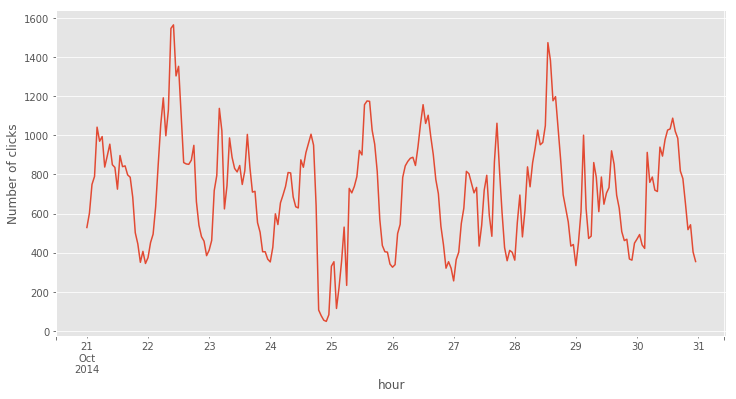

In [13]:
sample.groupby('hour')['click'].sum().plot(figsize=(12,6))
plt.ylabel('Number of clicks')

We can see time patterns there with low clicks at midnight at higher clicks during day time. Two notable observations are peaks at midday of 22 Oct and 28 Oct and the minimum at midnight 24 Oct.

Look at the traffic per hour.

Text(0,0.5,'Number of clicks')

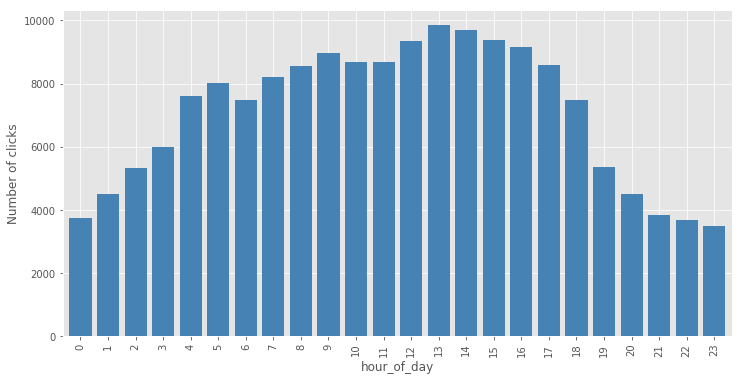

In [14]:
sample['hour_of_day'] = sample['hour'].dt.hour
sample.groupby('hour_of_day')['click'].sum().plot.bar(color='steelblue', width=0.8, figsize=(12,6))
plt.gca().set_ylim(ymin=0)
plt.ylabel('Number of clicks')

The click pattern makes sense but how the click probability looks like.

Text(0,0.5,'CTR')

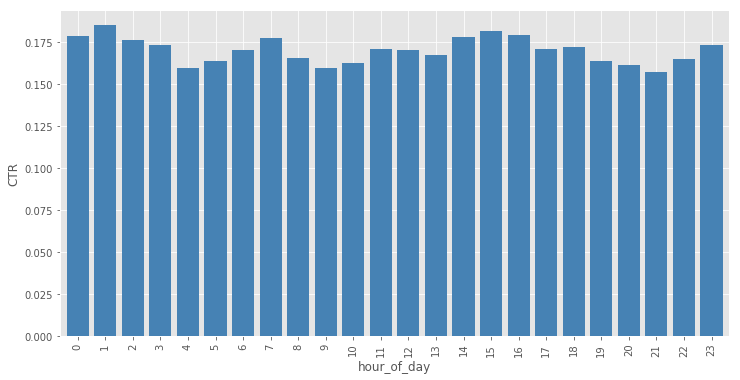

In [15]:
sample[['hour_of_day', 'click']].groupby('hour_of_day').mean().plot.bar(color='steelblue', width=0.8, legend=None, figsize=(12,6))
plt.ylabel('CTR')

There is some difference between hours. This could be useful for modelling later.

Now, look at day of the week.

Text(0,0.5,'Number of clicks')

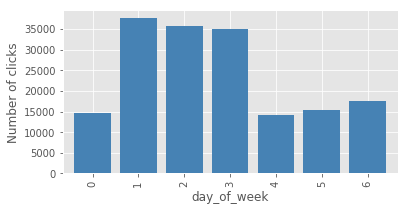

In [16]:
sample['day_of_week'] = sample['hour'].dt.weekday
sample.groupby('day_of_week')['click'].sum().plot.bar(color='steelblue', width=0.8, figsize=(6,3))
plt.gca().set_ylim(ymin=0)
plt.ylabel('Number of clicks')

Strange, CTR on Tuesday, Wednesday and Thursday are about twice higher than other days of the week.

Text(0,0.5,'CTR')

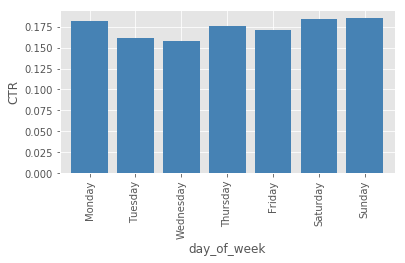

In [17]:
sample[['day_of_week', 'click']].groupby('day_of_week').mean().plot.bar(color='steelblue', width=0.8, legend=None, figsize=(6,3))
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.ylabel('CTR')

Cool, people click more on Tue, Wed and Thu but the click probability is actually smaller on Tue and Wed. This feature can be added to the modelling as well.

### Anonymized categorical variables `Cx`

In [18]:
def plot_categories(cat_features, nrows=3, ncols=3, figsize=(12,9)):
    fig = plt.figure(figsize=figsize)
    plt.tight_layout()
    
    for i, f in enumerate(cat_features):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        data = sample[[f, 'click']].groupby(f).mean().reset_index().rename(columns={'click': 'CTR'})
        plt.bar(np.arange(len(data[f])), data['CTR'], tick_label=data[f], width=0.9, color='steelblue')
        plt.title(f)

Low-cardinality categorical attributes.

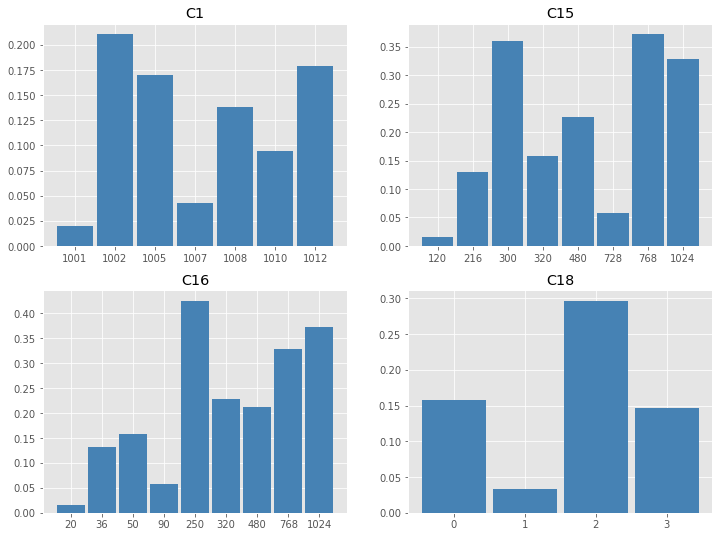

In [19]:
plot_categories(['C1', 'C15', 'C16', 'C18'], nrows=2, ncols=2)

Good, they could be useful to distinguish between click or not.

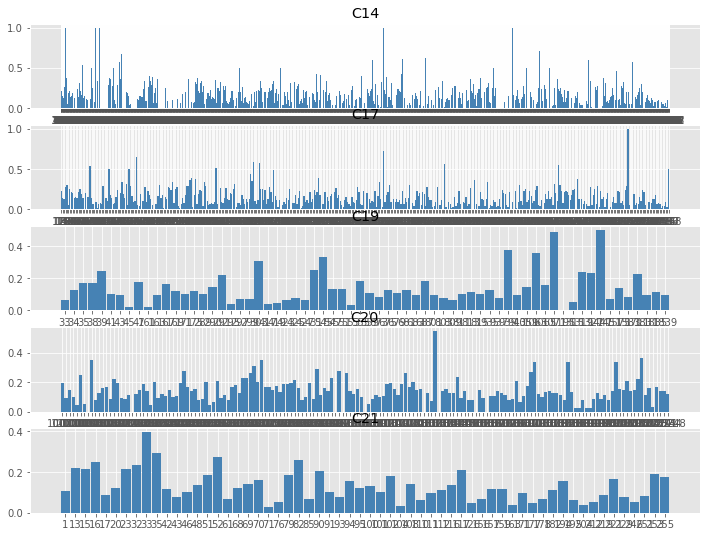

In [20]:
plot_categories(['C14', 'C17', 'C19', 'C20', 'C21'], nrows=5, ncols=1)

### Other low-cardinality categorical attributes

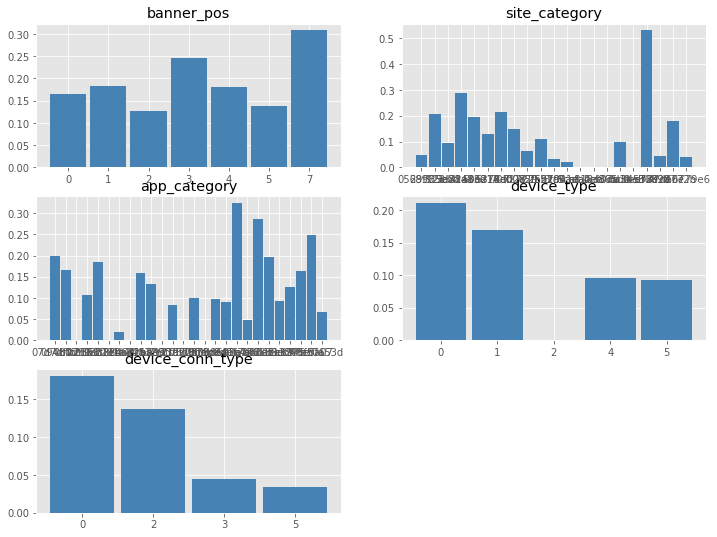

In [21]:
plot_categories(['banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type'], nrows=3, ncols=2)

One particular `site_category` has more than 50% CTR and `device_type` has 0% CTR. What are they?

In [22]:
sample[['site_category', 'click']].groupby('site_category').mean().sort_values('click', ascending=False).iloc[:5]

,click
site_category,
dedf689d,0.529887
3e814130,0.286510
5378d028,0.214286
28905ebd,0.207725
42a36e14,0.196970


In [23]:
sample[['device_type', 'click']].groupby('device_type').mean().sort_values('click').iloc[:5]

,click
device_type,
2,0.000000
5,0.091885
4,0.095218
1,0.169487
0,0.210580


That's all for exploratory data analysis.